In [102]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [70]:
df = pd.read_csv('analystFinal2.csv')

In [5]:
df.head()

,id,Nombre de trabajo,Compania,Salario,Categoria,Subcategoria,Localidad,Activo desde,Jornada,Tipo de contrato
0,0,Se necesita personal de 17 a 35 años,EMPLEOS EN GUAYAQUIL,"$ 500,00 (Mensual)",Almacenamiento / Logística / Distribución,Oficios y Profesiones,Guayaquil,16/08/2020 - 14:32:54 pm,Tiempo completo,Contrato a Plazo Indeterminado
1,1,Auxiliar de bodega,PARTESCAT,"500,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Quito,16/08/2020 - 12:46:40 pm,Tiempo Completo,Otro tipo de contrato
2,2,Chofer y oficial,Pluproxsa S.A.,"406,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Guayaquil,16/08/2020 - 12:46:36 pm,Tiempo Completo,Contrato por tiempo indefinido
3,3,Mecánico Motocicletas,MULTIMOTOS S. A.,"394,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Portoviejo,16/08/2020 - 12:25:27 pm,Tiempo Completo,Contrato por tiempo indefinido
4,4,Mecánico,CONFIDENCIAL,A convenir,Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Manta,16/08/2020 - 12:25:22 pm,Tiempo Completo,Contrato por tiempo indefinido


In [6]:
df2 = df.drop(columns=['id', 'Nombre de trabajo', 'Subcategoria', 'Activo desde'])

In [7]:
df2

,Compania,Salario,Categoria,Localidad,Jornada,Tipo de contrato
0,EMPLEOS EN GUAYAQUIL,"$ 500,00 (Mensual)",Almacenamiento / Logística / Distribución,Guayaquil,Tiempo completo,Contrato a Plazo Indeterminado
1,PARTESCAT,"500,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Quito,Tiempo Completo,Otro tipo de contrato
2,Pluproxsa S.A.,"406,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Guayaquil,Tiempo Completo,Contrato por tiempo indefinido
3,MULTIMOTOS S. A.,"394,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Portoviejo,Tiempo Completo,Contrato por tiempo indefinido
4,CONFIDENCIAL,A convenir,Almacenamiento / Logística / Distribución,Manta,Tiempo Completo,Contrato por tiempo indefinido
...,...,...,...,...,...,...
902,Salinas Yacht Club,"480,00 US$ (Neto mensual)",Administración / Contabilidad / Finanzas,Guayaquil,Tiempo Completo,Contrato por tiempo indefinido
903,Segumar sci s a,A convenir,Administración / Contabilidad / Finanzas,Latacunga,Tiempo Completo,Contrato por tiempo indefinido
904,GRUPO AK,A convenir,Administración / Contabilidad / Finanzas,Guayaquil,Tiempo Completo,Contrato por tiempo indefinido
905,Henry sport,A convenir,Administración / Contabilidad / Finanzas,Quito,Tiempo Completo,Contrato por tiempo indefinido


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 907 non-null    int64 
 1   Nombre de trabajo  907 non-null    object
 2   Compania           907 non-null    object
 3   Salario            907 non-null    object
 4   Categoria          907 non-null    object
 5   Subcategoria       907 non-null    object
 6   Localidad          907 non-null    object
 7   Activo desde       907 non-null    object
 8   Jornada            907 non-null    object
 9   Tipo de contrato   907 non-null    object
dtypes: int64(1), object(9)
memory usage: 71.0+ KB


In [9]:
df3 = df2[df2['Salario'] != 'A convenir']

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 906
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Compania          390 non-null    object
 1   Salario           390 non-null    object
 2   Categoria         390 non-null    object
 3   Localidad         390 non-null    object
 4   Jornada           390 non-null    object
 5   Tipo de contrato  390 non-null    object
dtypes: object(6)
memory usage: 21.3+ KB


In [11]:
df3

,Compania,Salario,Categoria,Localidad,Jornada,Tipo de contrato
0,EMPLEOS EN GUAYAQUIL,"$ 500,00 (Mensual)",Almacenamiento / Logística / Distribución,Guayaquil,Tiempo completo,Contrato a Plazo Indeterminado
1,PARTESCAT,"500,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Quito,Tiempo Completo,Otro tipo de contrato
2,Pluproxsa S.A.,"406,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Guayaquil,Tiempo Completo,Contrato por tiempo indefinido
3,MULTIMOTOS S. A.,"394,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Portoviejo,Tiempo Completo,Contrato por tiempo indefinido
6,EMPLEOS EN GUAYAQUIL,"$ 500,00 (Mensual)",Almacenamiento / Logística / Distribución,Guayaquil,Tiempo completo,Contrato a Plazo Indeterminado
...,...,...,...,...,...,...
889,AUTECNA PARTS CIA LTDA,"400,00 US$ (Neto mensual)",Administración / Contabilidad / Finanzas,Quito,Tiempo Completo,Contrato por tiempo indefinido
893,CONFIDENCIAL,"700,00 US$ (Neto mensual)",Administración / Contabilidad / Finanzas,Guayaquil,Tiempo Completo,Contrato por tiempo indefinido
897,CONSEJO NORUEGO PARA REFUGIADOS,"1.000,00 US$ (Neto mensual)",Administración / Contabilidad / Finanzas,Tulcán,Tiempo Completo,Contrato por tiempo determinado
902,Salinas Yacht Club,"480,00 US$ (Neto mensual)",Administración / Contabilidad / Finanzas,Guayaquil,Tiempo Completo,Contrato por tiempo indefinido


In [12]:
def parseSalario(s):
    s2 = s.replace('$','')
    commaIdx = s2.find(',')
    final = s2[:commaIdx]
    #print(final)
    #return int(final)
    return final

In [13]:
df3['Salario'] = df3['Salario'].map(parseSalario)

<ipython-input-13-58f97c5d8ccf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Salario'] = df3['Salario'].map(parseSalario)


In [14]:
df3

,Compania,Salario,Categoria,Localidad,Jornada,Tipo de contrato
0,EMPLEOS EN GUAYAQUIL,500,Almacenamiento / Logística / Distribución,Guayaquil,Tiempo completo,Contrato a Plazo Indeterminado
1,PARTESCAT,500,Almacenamiento / Logística / Distribución,Quito,Tiempo Completo,Otro tipo de contrato
2,Pluproxsa S.A.,406,Almacenamiento / Logística / Distribución,Guayaquil,Tiempo Completo,Contrato por tiempo indefinido
3,MULTIMOTOS S. A.,394,Almacenamiento / Logística / Distribución,Portoviejo,Tiempo Completo,Contrato por tiempo indefinido
6,EMPLEOS EN GUAYAQUIL,500,Almacenamiento / Logística / Distribución,Guayaquil,Tiempo completo,Contrato a Plazo Indeterminado
...,...,...,...,...,...,...
889,AUTECNA PARTS CIA LTDA,400,Administración / Contabilidad / Finanzas,Quito,Tiempo Completo,Contrato por tiempo indefinido
893,CONFIDENCIAL,700,Administración / Contabilidad / Finanzas,Guayaquil,Tiempo Completo,Contrato por tiempo indefinido
897,CONSEJO NORUEGO PARA REFUGIADOS,1.000,Administración / Contabilidad / Finanzas,Tulcán,Tiempo Completo,Contrato por tiempo determinado
902,Salinas Yacht Club,480,Administración / Contabilidad / Finanzas,Guayaquil,Tiempo Completo,Contrato por tiempo indefinido


In [15]:
df3['Salario'] = pd.to_numeric(df3['Salario'])

<ipython-input-15-95b856457402>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Salario'] = pd.to_numeric(df3['Salario'])


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 906
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Compania          390 non-null    object 
 1   Salario           390 non-null    float64
 2   Categoria         390 non-null    object 
 3   Localidad         390 non-null    object 
 4   Jornada           390 non-null    object 
 5   Tipo de contrato  390 non-null    object 
dtypes: float64(1), object(5)
memory usage: 21.3+ KB


In [17]:
df3

,Compania,Salario,Categoria,Localidad,Jornada,Tipo de contrato
0,EMPLEOS EN GUAYAQUIL,500.0,Almacenamiento / Logística / Distribución,Guayaquil,Tiempo completo,Contrato a Plazo Indeterminado
1,PARTESCAT,500.0,Almacenamiento / Logística / Distribución,Quito,Tiempo Completo,Otro tipo de contrato
2,Pluproxsa S.A.,406.0,Almacenamiento / Logística / Distribución,Guayaquil,Tiempo Completo,Contrato por tiempo indefinido
3,MULTIMOTOS S. A.,394.0,Almacenamiento / Logística / Distribución,Portoviejo,Tiempo Completo,Contrato por tiempo indefinido
6,EMPLEOS EN GUAYAQUIL,500.0,Almacenamiento / Logística / Distribución,Guayaquil,Tiempo completo,Contrato a Plazo Indeterminado
...,...,...,...,...,...,...
889,AUTECNA PARTS CIA LTDA,400.0,Administración / Contabilidad / Finanzas,Quito,Tiempo Completo,Contrato por tiempo indefinido
893,CONFIDENCIAL,700.0,Administración / Contabilidad / Finanzas,Guayaquil,Tiempo Completo,Contrato por tiempo indefinido
897,CONSEJO NORUEGO PARA REFUGIADOS,1.0,Administración / Contabilidad / Finanzas,Tulcán,Tiempo Completo,Contrato por tiempo determinado
902,Salinas Yacht Club,480.0,Administración / Contabilidad / Finanzas,Guayaquil,Tiempo Completo,Contrato por tiempo indefinido


In [18]:
df3['Jornada'] = df3['Jornada'].apply(lambda x: x.upper())

<ipython-input-18-d6c9e34d9943>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Jornada'] = df3['Jornada'].apply(lambda x: x.upper())


In [71]:
df['Jornada'] = df['Jornada'].apply(lambda x: x.upper())

In [51]:
df

,id,Nombre de trabajo,Compania,Salario,Categoria,Subcategoria,Localidad,Activo desde,Jornada,Tipo de contrato
0,0,Se necesita personal de 17 a 35 años,EMPLEOS EN GUAYAQUIL,"$ 500,00 (Mensual)",Almacenamiento / Logística / Distribución,Oficios y Profesiones,Guayaquil,2020-08-16,TIEMPO COMPLETO,Contrato a Plazo Indeterminado
1,1,Auxiliar de bodega,PARTESCAT,"500,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Quito,2020-08-16,TIEMPO COMPLETO,Otro tipo de contrato
2,2,Chofer y oficial,Pluproxsa S.A.,"406,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Guayaquil,2020-08-16,TIEMPO COMPLETO,Contrato por tiempo indefinido
3,3,Mecánico Motocicletas,MULTIMOTOS S. A.,"394,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Portoviejo,2020-08-16,TIEMPO COMPLETO,Contrato por tiempo indefinido
4,4,Mecánico,CONFIDENCIAL,A convenir,Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Manta,2020-08-16,TIEMPO COMPLETO,Contrato por tiempo indefinido
...,...,...,...,...,...,...,...,...,...,...
902,902,Asistente de directorio,Salinas Yacht Club,"480,00 US$ (Neto mensual)",Administración / Contabilidad / Finanzas,Administración,Guayaquil,2020-07-28,TIEMPO COMPLETO,Contrato por tiempo indefinido
903,903,Jefe administrativo,Segumar sci s a,A convenir,Administración / Contabilidad / Finanzas,Administración,Latacunga,2020-07-27,TIEMPO COMPLETO,Contrato por tiempo indefinido
904,904,Gerente de Operaciones,GRUPO AK,A convenir,Administración / Contabilidad / Finanzas,Administración,Guayaquil,2020-07-27,TIEMPO COMPLETO,Contrato por tiempo indefinido
905,905,Asistente contable,Henry sport,A convenir,Administración / Contabilidad / Finanzas,Contabilidad / Finanzas,Quito,2020-07-27,TIEMPO COMPLETO,Contrato por tiempo indefinido


In [21]:
df3

,Compania,Salario,Categoria,Localidad,Jornada,Tipo de contrato
0,EMPLEOS EN GUAYAQUIL,500.0,Almacenamiento / Logística / Distribución,Guayaquil,TIEMPO COMPLETO,Contrato a Plazo Indeterminado
1,PARTESCAT,500.0,Almacenamiento / Logística / Distribución,Quito,TIEMPO COMPLETO,Otro tipo de contrato
2,Pluproxsa S.A.,406.0,Almacenamiento / Logística / Distribución,Guayaquil,TIEMPO COMPLETO,Contrato por tiempo indefinido
3,MULTIMOTOS S. A.,394.0,Almacenamiento / Logística / Distribución,Portoviejo,TIEMPO COMPLETO,Contrato por tiempo indefinido
6,EMPLEOS EN GUAYAQUIL,500.0,Almacenamiento / Logística / Distribución,Guayaquil,TIEMPO COMPLETO,Contrato a Plazo Indeterminado
...,...,...,...,...,...,...
889,AUTECNA PARTS CIA LTDA,400.0,Administración / Contabilidad / Finanzas,Quito,TIEMPO COMPLETO,Contrato por tiempo indefinido
893,CONFIDENCIAL,700.0,Administración / Contabilidad / Finanzas,Guayaquil,TIEMPO COMPLETO,Contrato por tiempo indefinido
897,CONSEJO NORUEGO PARA REFUGIADOS,1.0,Administración / Contabilidad / Finanzas,Tulcán,TIEMPO COMPLETO,Contrato por tiempo determinado
902,Salinas Yacht Club,480.0,Administración / Contabilidad / Finanzas,Guayaquil,TIEMPO COMPLETO,Contrato por tiempo indefinido


In [22]:
G = nx.DiGraph()

In [23]:
for index, row in df.iterrows():    
    G.add_edge(row['Categoria'], row['Jornada'])

In [24]:
d = nx.degree(G)

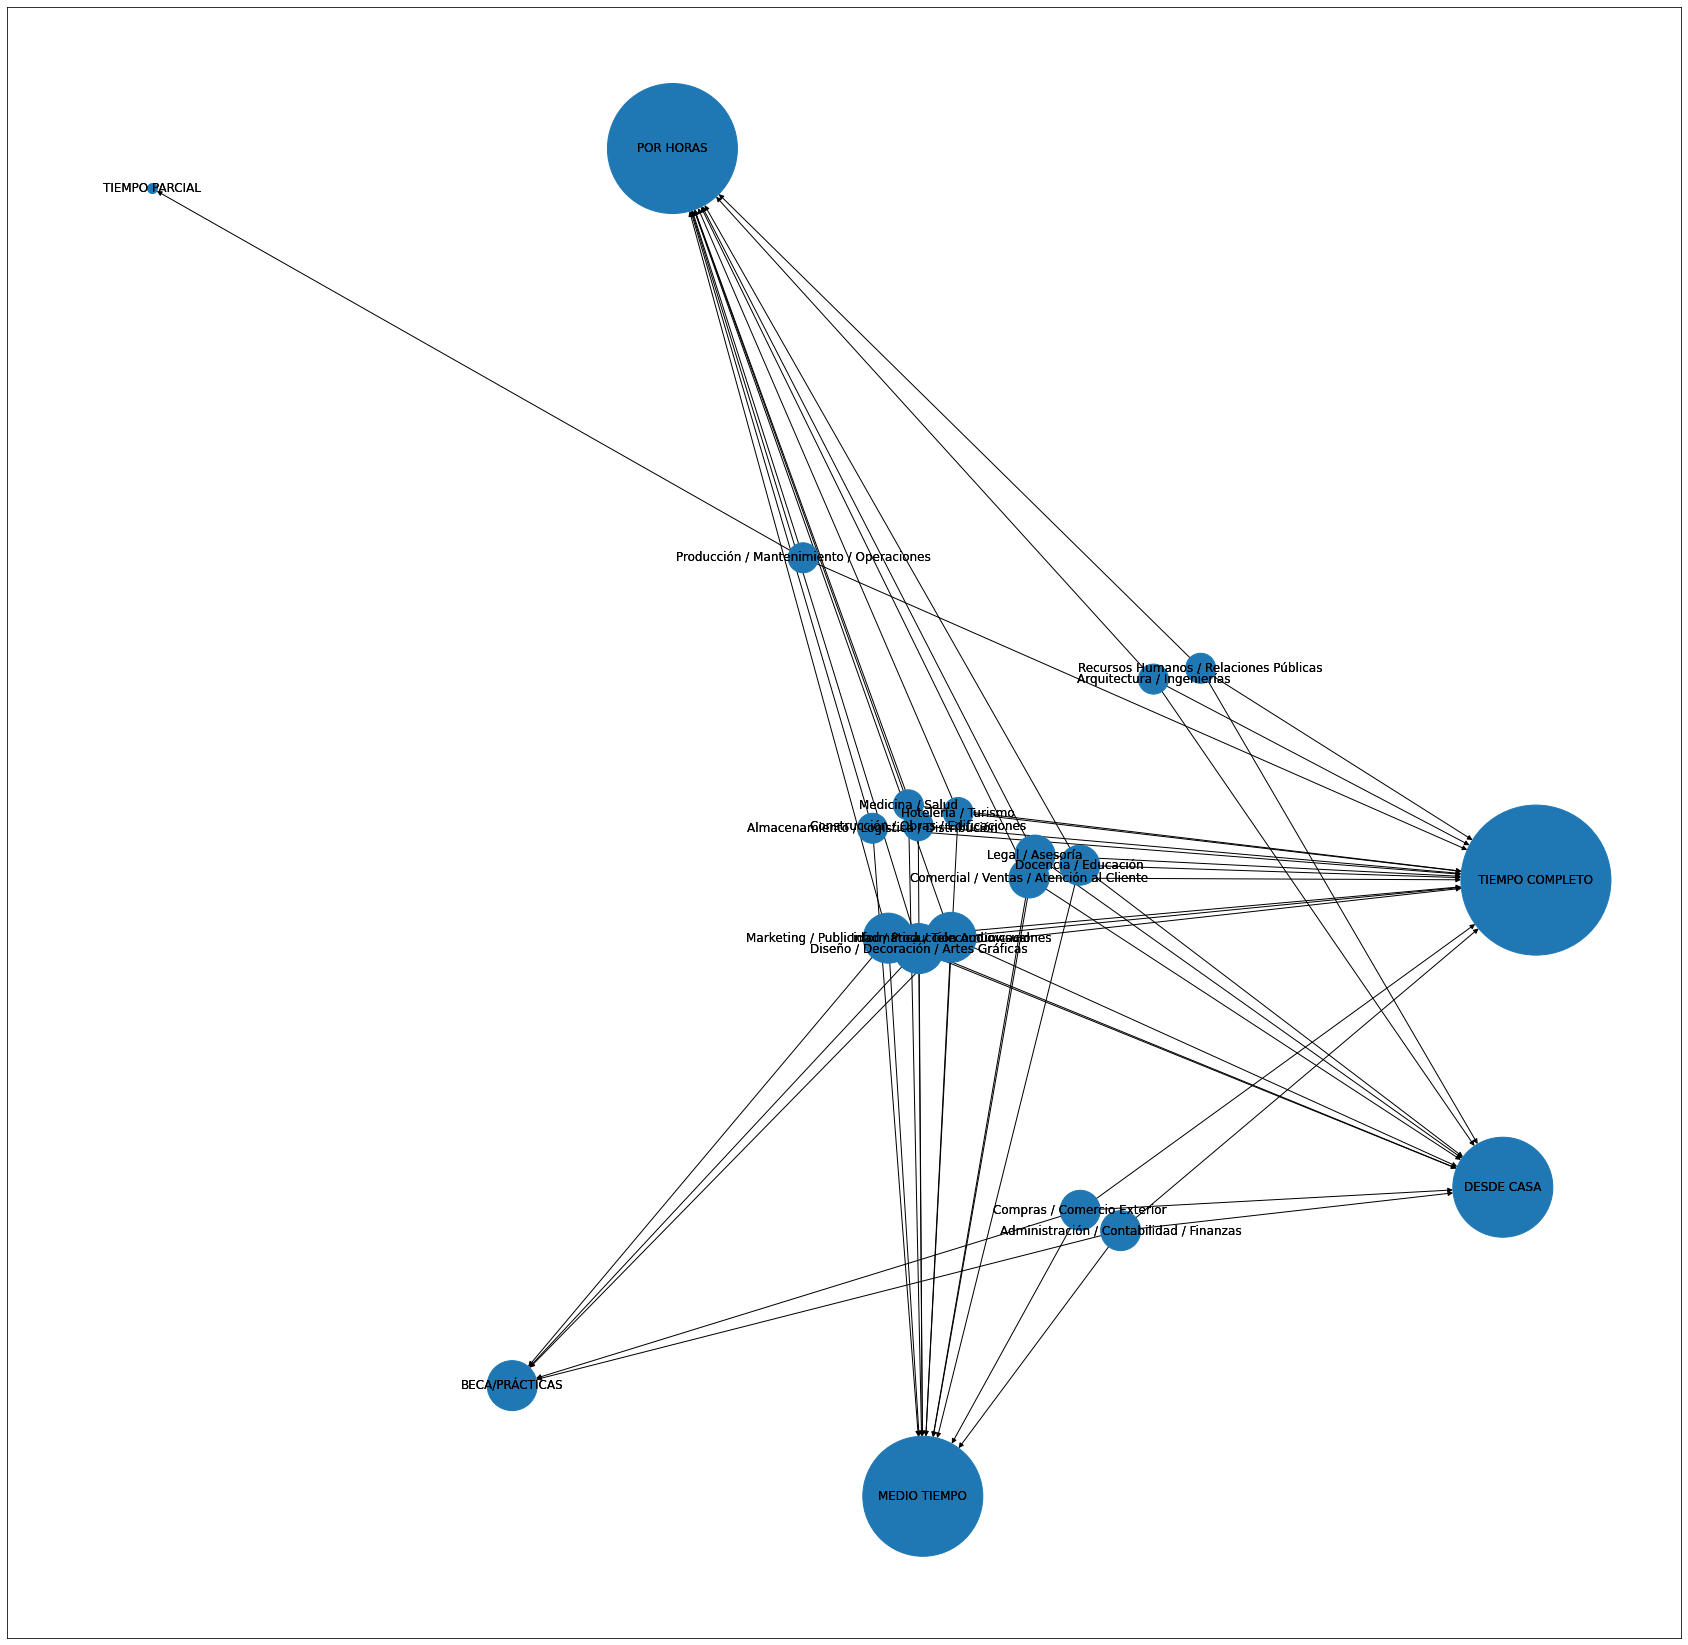

In [133]:
#plt.figure(3, figsize=(20, 30))
#nx.spring_layout(G,k=0.3*1/np.sqrt(len(G.nodes())),iterations=20)
#nx.draw_networkx(G, nodelist=list(dict(d).keys()), node_size=[v * v * 100 for v in list(dict(d).values())])

pos = nx.spring_layout(G, k=0.8*1/np.sqrt(len(G.nodes())), iterations=20)
plt.figure(3, figsize=(30, 30))
nx.draw_networkx(G, 8, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

In [26]:
G2 = nx.DiGraph()
for index, row in df.iterrows():    
    G2.add_edge(row['Localidad'], row['Jornada'])

In [27]:
d2 = nx.degree(G2)

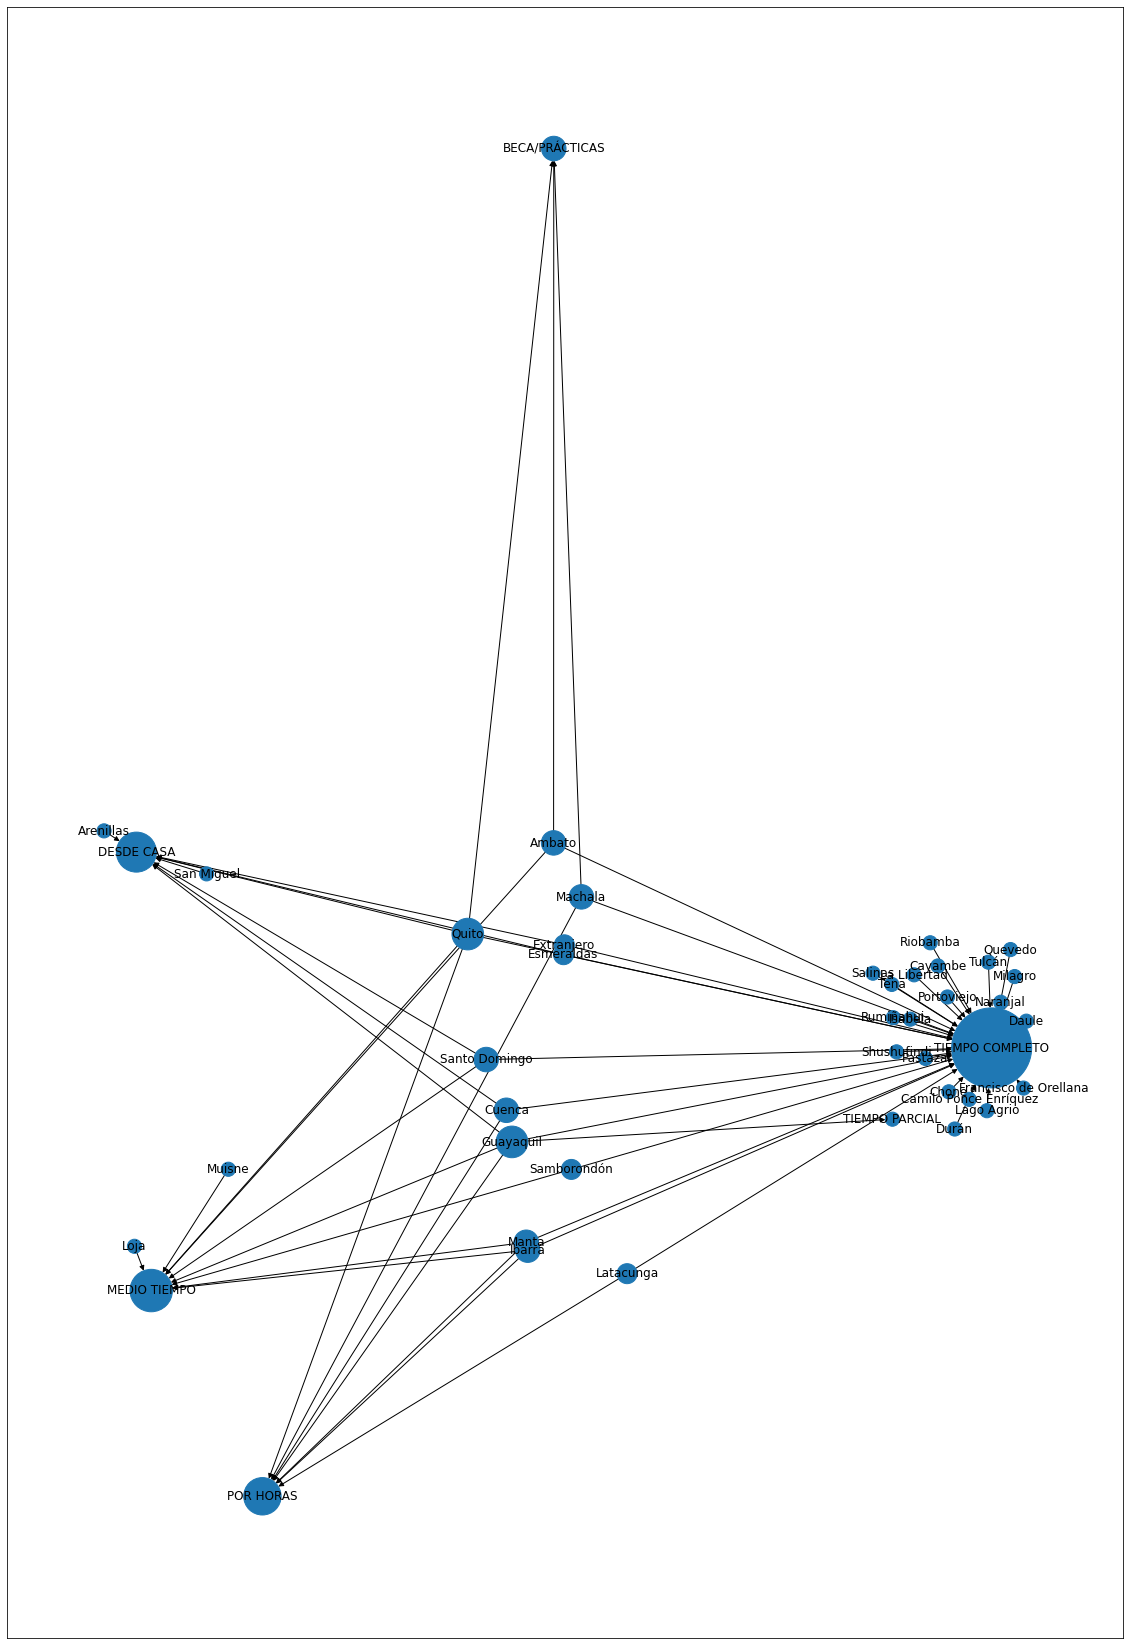

In [28]:
plt.figure(figsize=(20, 30))
nx.spring_layout(G2)
nx.draw_networkx(G2, nodelist=list(dict(d2).keys()), node_size=[v * 200 for v in list(dict(d2).values())])

In [29]:
df

,id,Nombre de trabajo,Compania,Salario,Categoria,Subcategoria,Localidad,Activo desde,Jornada,Tipo de contrato
0,0,Se necesita personal de 17 a 35 años,EMPLEOS EN GUAYAQUIL,"$ 500,00 (Mensual)",Almacenamiento / Logística / Distribución,Oficios y Profesiones,Guayaquil,16/08/2020 - 14:32:54 pm,TIEMPO COMPLETO,Contrato a Plazo Indeterminado
1,1,Auxiliar de bodega,PARTESCAT,"500,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Quito,16/08/2020 - 12:46:40 pm,TIEMPO COMPLETO,Otro tipo de contrato
2,2,Chofer y oficial,Pluproxsa S.A.,"406,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Guayaquil,16/08/2020 - 12:46:36 pm,TIEMPO COMPLETO,Contrato por tiempo indefinido
3,3,Mecánico Motocicletas,MULTIMOTOS S. A.,"394,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Portoviejo,16/08/2020 - 12:25:27 pm,TIEMPO COMPLETO,Contrato por tiempo indefinido
4,4,Mecánico,CONFIDENCIAL,A convenir,Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Manta,16/08/2020 - 12:25:22 pm,TIEMPO COMPLETO,Contrato por tiempo indefinido
...,...,...,...,...,...,...,...,...,...,...
902,902,Asistente de directorio,Salinas Yacht Club,"480,00 US$ (Neto mensual)",Administración / Contabilidad / Finanzas,Administración,Guayaquil,28/07/2020 - 10:25:42 am,TIEMPO COMPLETO,Contrato por tiempo indefinido
903,903,Jefe administrativo,Segumar sci s a,A convenir,Administración / Contabilidad / Finanzas,Administración,Latacunga,27/07/2020 - 17:15:25 pm,TIEMPO COMPLETO,Contrato por tiempo indefinido
904,904,Gerente de Operaciones,GRUPO AK,A convenir,Administración / Contabilidad / Finanzas,Administración,Guayaquil,27/07/2020 - 17:15:22 pm,TIEMPO COMPLETO,Contrato por tiempo indefinido
905,905,Asistente contable,Henry sport,A convenir,Administración / Contabilidad / Finanzas,Contabilidad / Finanzas,Quito,27/07/2020 - 12:01:57 pm,TIEMPO COMPLETO,Contrato por tiempo indefinido


In [32]:
def parseDate(d):
    idx = d.find("-")
    dParse = d[:idx]
    return dParse

In [72]:
df['Activo desde'] = df['Activo desde'].map(parseDate)

In [73]:
df

,id,Nombre de trabajo,Compania,Salario,Categoria,Subcategoria,Localidad,Activo desde,Jornada,Tipo de contrato
0,0,Se necesita personal de 17 a 35 años,EMPLEOS EN GUAYAQUIL,"$ 500,00 (Mensual)",Almacenamiento / Logística / Distribución,Oficios y Profesiones,Guayaquil,16/08/2020,TIEMPO COMPLETO,Contrato a Plazo Indeterminado
1,1,Auxiliar de bodega,PARTESCAT,"500,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Quito,16/08/2020,TIEMPO COMPLETO,Otro tipo de contrato
2,2,Chofer y oficial,Pluproxsa S.A.,"406,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Guayaquil,16/08/2020,TIEMPO COMPLETO,Contrato por tiempo indefinido
3,3,Mecánico Motocicletas,MULTIMOTOS S. A.,"394,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Portoviejo,16/08/2020,TIEMPO COMPLETO,Contrato por tiempo indefinido
4,4,Mecánico,CONFIDENCIAL,A convenir,Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Manta,16/08/2020,TIEMPO COMPLETO,Contrato por tiempo indefinido
...,...,...,...,...,...,...,...,...,...,...
902,902,Asistente de directorio,Salinas Yacht Club,"480,00 US$ (Neto mensual)",Administración / Contabilidad / Finanzas,Administración,Guayaquil,28/07/2020,TIEMPO COMPLETO,Contrato por tiempo indefinido
903,903,Jefe administrativo,Segumar sci s a,A convenir,Administración / Contabilidad / Finanzas,Administración,Latacunga,27/07/2020,TIEMPO COMPLETO,Contrato por tiempo indefinido
904,904,Gerente de Operaciones,GRUPO AK,A convenir,Administración / Contabilidad / Finanzas,Administración,Guayaquil,27/07/2020,TIEMPO COMPLETO,Contrato por tiempo indefinido
905,905,Asistente contable,Henry sport,A convenir,Administración / Contabilidad / Finanzas,Contabilidad / Finanzas,Quito,27/07/2020,TIEMPO COMPLETO,Contrato por tiempo indefinido


In [75]:
df['Activo desde'] = pd.to_datetime(df['Activo desde'], dayfirst=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 907 non-null    int64         
 1   Nombre de trabajo  907 non-null    object        
 2   Compania           907 non-null    object        
 3   Salario            907 non-null    object        
 4   Categoria          907 non-null    object        
 5   Subcategoria       907 non-null    object        
 6   Localidad          907 non-null    object        
 7   Activo desde       907 non-null    datetime64[ns]
 8   Jornada            907 non-null    object        
 9   Tipo de contrato   907 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 71.0+ KB


In [78]:
df['Mes'] = pd.DatetimeIndex(df['Activo desde']).month

In [79]:
df

,id,Nombre de trabajo,Compania,Salario,Categoria,Subcategoria,Localidad,Activo desde,Jornada,Tipo de contrato,Mes
0,0,Se necesita personal de 17 a 35 años,EMPLEOS EN GUAYAQUIL,"$ 500,00 (Mensual)",Almacenamiento / Logística / Distribución,Oficios y Profesiones,Guayaquil,2020-08-16,TIEMPO COMPLETO,Contrato a Plazo Indeterminado,8
1,1,Auxiliar de bodega,PARTESCAT,"500,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Quito,2020-08-16,TIEMPO COMPLETO,Otro tipo de contrato,8
2,2,Chofer y oficial,Pluproxsa S.A.,"406,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Guayaquil,2020-08-16,TIEMPO COMPLETO,Contrato por tiempo indefinido,8
3,3,Mecánico Motocicletas,MULTIMOTOS S. A.,"394,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Portoviejo,2020-08-16,TIEMPO COMPLETO,Contrato por tiempo indefinido,8
4,4,Mecánico,CONFIDENCIAL,A convenir,Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Manta,2020-08-16,TIEMPO COMPLETO,Contrato por tiempo indefinido,8
...,...,...,...,...,...,...,...,...,...,...,...
902,902,Asistente de directorio,Salinas Yacht Club,"480,00 US$ (Neto mensual)",Administración / Contabilidad / Finanzas,Administración,Guayaquil,2020-07-28,TIEMPO COMPLETO,Contrato por tiempo indefinido,7
903,903,Jefe administrativo,Segumar sci s a,A convenir,Administración / Contabilidad / Finanzas,Administración,Latacunga,2020-07-27,TIEMPO COMPLETO,Contrato por tiempo indefinido,7
904,904,Gerente de Operaciones,GRUPO AK,A convenir,Administración / Contabilidad / Finanzas,Administración,Guayaquil,2020-07-27,TIEMPO COMPLETO,Contrato por tiempo indefinido,7
905,905,Asistente contable,Henry sport,A convenir,Administración / Contabilidad / Finanzas,Contabilidad / Finanzas,Quito,2020-07-27,TIEMPO COMPLETO,Contrato por tiempo indefinido,7


In [80]:
df['Mes'].unique()

array([8, 7])

In [60]:
df[df['Mes'] == 11]

,id,Nombre de trabajo,Compania,Salario,Categoria,Subcategoria,Localidad,Activo desde,Jornada,Tipo de contrato,Mes
325,325,Community Manager Guayaquil,EYA C.A,A convenir,Diseño / Decoración / Artes Gráficas,Diseño en General,Guayaquil,2020-11-08,POR HORAS,Otro tipo de contrato,11
326,326,Community Manager Guayaquil,EYA C.A,A convenir,Diseño / Decoración / Artes Gráficas,Diseño en General,Guayaquil,2020-11-08,POR HORAS,Otro tipo de contrato,11
387,387,Técnico de Laboratorio,GEDATECU SA,"600,00 US$ (Neto mensual)",Informática / Telecomunicaciones,Sistemas,Rumiñahui,2020-11-08,TIEMPO COMPLETO,Contrato por tiempo indefinido,11
388,388,Analista QA,NDM Technology & Consultancy,A convenir,Informática / Telecomunicaciones,Sistemas,Quito,2020-11-08,TIEMPO COMPLETO,Contrato por tiempo indefinido,11
389,389,Técnico de Soporte en Sitio,Computadores y equipos,"500,00 US$ (Neto mensual)",Informática / Telecomunicaciones,Sistemas,Francisco de Orellana,2020-11-08,TIEMPO COMPLETO,Contrato de obra o labor,11
390,390,Técnico de Soporte en Sitio,Computadores y equipos,"500,00 US$ (Neto mensual)",Informática / Telecomunicaciones,Sistemas,Lago Agrio,2020-11-08,TIEMPO COMPLETO,Contrato de obra o labor,11
391,391,Contratista de Fibra Óptica,GEDATECU SA,A convenir,Informática / Telecomunicaciones,Sistemas,Guayaquil,2020-11-08,TIEMPO COMPLETO,Otro tipo de contrato,11
392,392,Técnico de Soporte en Sitio,Computadores y equipos,"500,00 US$ (Neto mensual)",Informática / Telecomunicaciones,Sistemas,Manta,2020-11-08,TIEMPO COMPLETO,Contrato de obra o labor,11
393,393,Contratista Fibra Optica,GEDATECU SA,A convenir,Informática / Telecomunicaciones,Sistemas,Manta,2020-11-08,TIEMPO COMPLETO,Otro tipo de contrato,11
427,427,Técnico de Laboratorio,GEDATECU SA,"600,00 US$ (Neto mensual)",Informática / Telecomunicaciones,Sistemas,Rumiñahui,2020-11-08,TIEMPO COMPLETO,Contrato por tiempo indefinido,11


In [81]:
df[df['id'] == 325]

,id,Nombre de trabajo,Compania,Salario,Categoria,Subcategoria,Localidad,Activo desde,Jornada,Tipo de contrato,Mes
325,325,Community Manager Guayaquil,EYA C.A,A convenir,Diseño / Decoración / Artes Gráficas,Diseño en General,Guayaquil,2020-08-11,POR HORAS,Otro tipo de contrato,8


In [82]:
G3 = nx.DiGraph()

In [83]:
for index, row in df.iterrows():    
    G3.add_edge(row['Mes'], row['Jornada'])
d3 = nx.degree(G3)

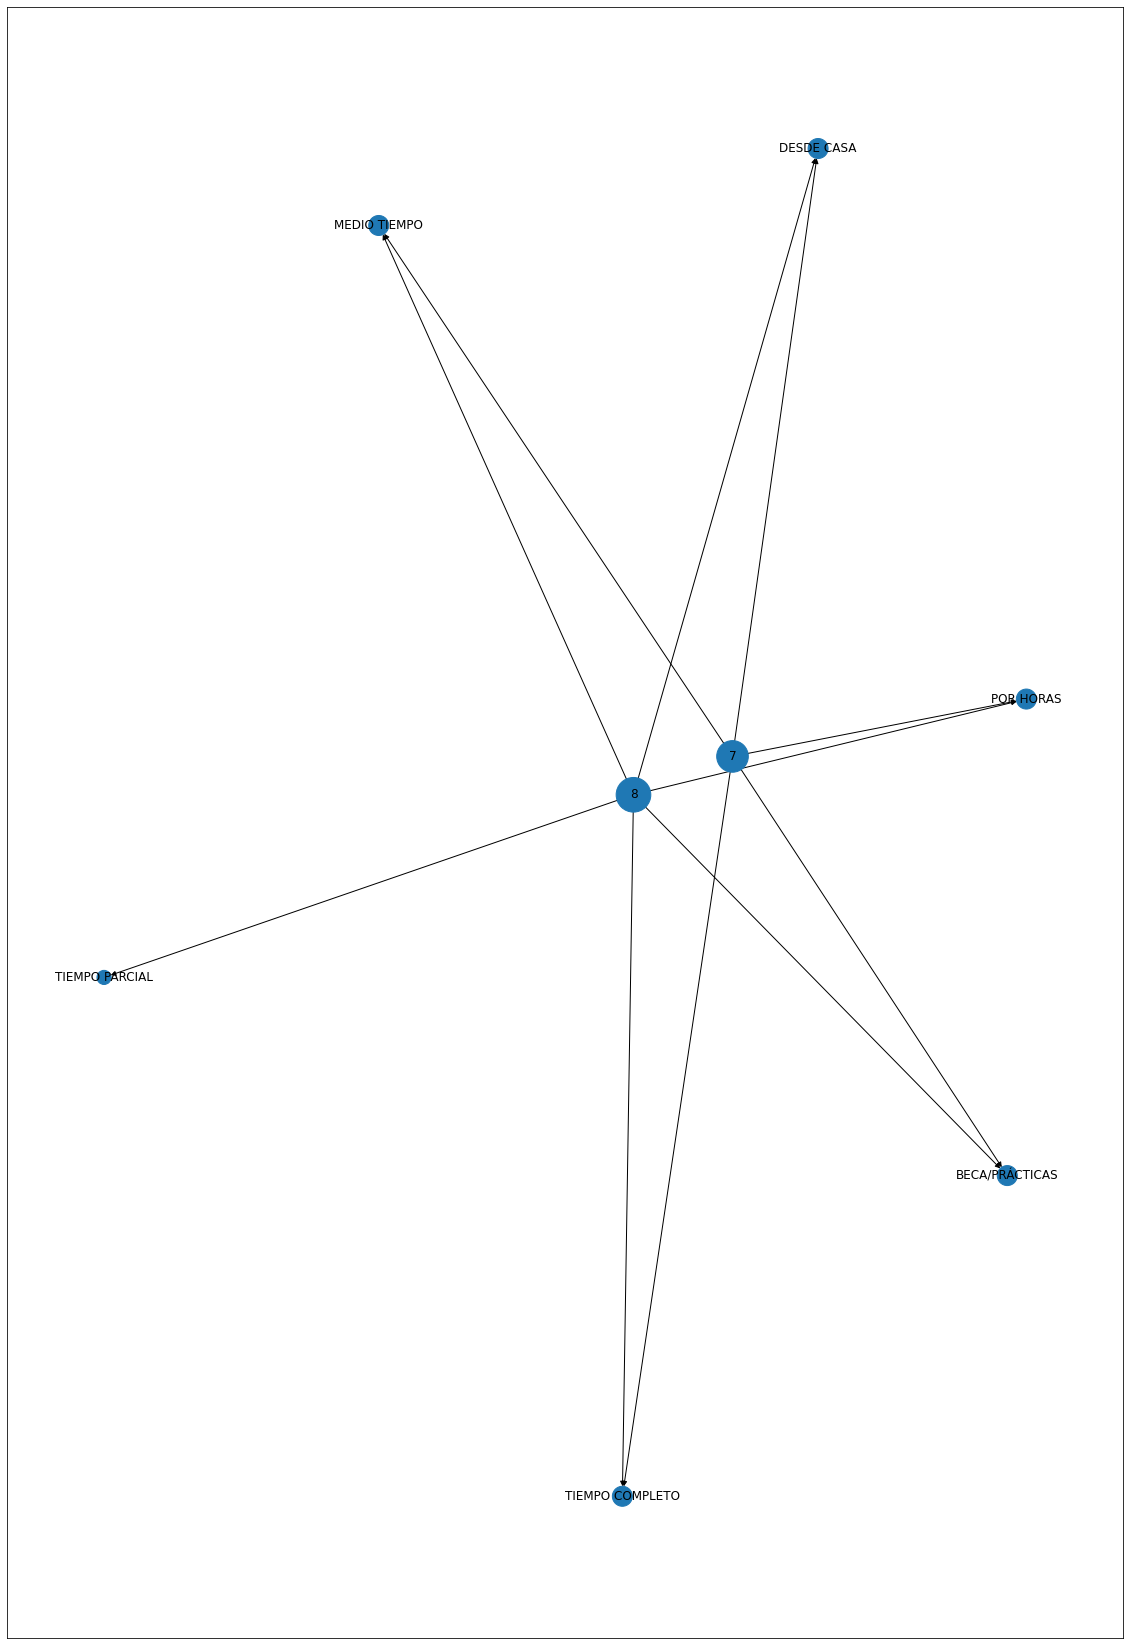

In [84]:
plt.figure(figsize=(20, 30))
nx.spring_layout(G3)
nx.draw_networkx(G3, nodelist=list(dict(d3).keys()), node_size=[v * 200 for v in list(dict(d3).values())])